<a href="https://colab.research.google.com/github/olumideaeo/natural-language-processing/blob/master/stance_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
!pip install keybert[flair]
!pip install keybert[gensim]
!pip install keybert[spacy]
!pip install keybert[use]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import pandas as pd
data = pd.read_csv('/content/train.tsv', on_bad_lines='skip', delim_whitespace=True)

In [51]:
from keybert import KeyBERT

In [52]:
data.head()

,,,,,,,,,,,,,,,,,,id,Tweet,Claim,Stance,Premise
3054935,@realDonaldTrump,It's,too,dangerous,to,hold,the,"RNC,",but,let's,send,students,and,teachers,back,to,school,#TrumpLiesAmericansDie,school,closures,FAVOR,1.0
849806963,@jmulich,@Standwi78914908,The,strongest,motive,for,this,is,HongKongers’,distrust,in,China.,#WuhanVirus,#CCPVirus,face,masks,NONE,0,NaN,NaN,NaN,NaN
1443255705,@sandeep25a,Hehe....,What,about,u,Bro,:star-struck::hearts:,stay,at,home,orders,NONE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2739465,@LaraCrabb,little,wet,men,mincing,along,perfect,analogy,of,the,mask,gimp.,face,masks,AGAINST,0,NaN,NaN,NaN,NaN,NaN,NaN
1040600880,@LawrenceBJones3,Their,is,an,emotional,toll,on,our,children,stay,at,home,orders,NONE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
print('Training Set Shape = {}'.format(data.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(data.memory_usage().sum() / 1024**2))

Training Set Shape = (1142, 5)
Training Set Memory Usage = 0.40 MB


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1142 entries, (3054935, '@realDonaldTrump', "It's", 'too', 'dangerous', 'to', 'hold', 'the', 'RNC,', 'but', "let's", 'send', 'students', 'and', 'teachers', 'back', 'to', 'school') to (161635, '@GOPLeader', 'The', '#TrumpVirus', 'continues', 'to', 'spread', '…', 'and', 'you', 'want', 'to', 'send', 'CHILDREN', 'to', 'school!', 'SICK', 'BASTARD!!')
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       538 non-null    object 
 1   Tweet    403 non-null    object 
 2   Claim    278 non-null    object 
 3   Stance   184 non-null    object 
 4   Premise  86 non-null     float64
dtypes: float64(1), object(4)
memory usage: 411.7+ KB


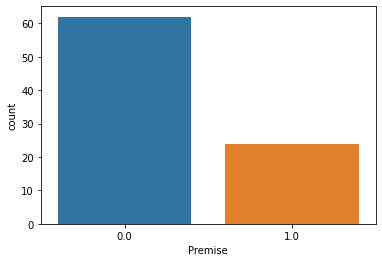

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
premise = data['Premise']
sns.countplot(premise)
plt.xlabel('Premise');

In [56]:
positive = data[data['Rating'] == 1 ]
negative = data[data['Rating'] == 0]

KeyError: ignored

In [68]:
# convert to lowercase
#data['clean_text']=data['Tweet'].str.lower()
#remove URLS
#data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"http\S+", "", elem))
#remove ponctuation
#data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"[^\w\s]", "", elem))
#remove 
#data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'/n',"",elem))
#remove degits
#data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\d+',"",elem))
#remove multiple spaces
#data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+'," ",elem))
#remove single caracter
data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+[a-zA-Z]\s+'," ",elem))


TypeError: ignored

In [60]:
data_train=clean_text(data_train)
#data_test=clean_text(data_test)

TypeError: ignored

In [ ]:
import re
data = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(data))

In [ ]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
data = emoji_pattern.sub(r'', data) # no emoji

In [ ]:
!pip install emoji

In [ ]:
data_clean = clean_tweets(data)

In [ ]:
def encode_sentence(sent):
  return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sent))

In [ ]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)